In [1]:
using Plots

In [2]:
include("rk4simple.jl")

rk2_step! (generic function with 1 method)

In [3]:
function deq2!(du, u, p, t)
    du[1] = u[2]
    du[2] = -100.0*u[1] + 8.0*cos(9.0*t) 
end
function fex2!(f, p, t)
    @. f = p[1]*cos(10.0*t) + p[2]*sin(10.0*t) + 8.0/19.0*cos(9.0*t)
end
function dfex2!(df, p, t)
    @. df = -10.0*p[1]*sin(10.0*t) + 10.0*p[2]*cos(10.0*t) - 72.0/19.0*sin(9.0*t)
end

dfex2! (generic function with 1 method)

In [4]:
function ferr2!(e, fh, fex)
    epsilon = 1.23453569899e-16
    @. e = abs(fh - fex) + epsilon
end

ferr2! (generic function with 1 method)

In [5]:
function evolve(func, trange0, nt0, level)
    tb = trange0[1]
    tf = trange0[2]
    
    p0 = [1.0, 0.0]
    u01 = [0.0]
    u02 = [0.0]
    t = [tb]
    
    fex2!(u01, p0, t)
    dfex2!(u02, p0, t)
    u0 = [u01[1], u02[1]]
    
    dt0 = (tf - tb)/(nt0 - 1)
    dt = dt0/2^level
    
    nt = (2^level)*(nt0 - 1) + 1
    
    u1 = zeros(nt0)
    u2 = zeros(nt0)
    t1 = zeros(nt0)
    
    t1[1] = tb
    u1[1] = u0[1]
    u2[1] = u0[2]
    
    ofreq = 2^level
    un = u0
    
    m = 2
    
    for i = 1:nt-1
        rk4_step!(func, un, p0, t, dt)
        if i % ofreq == 0
            # output
            t1[m] = t[1]
            u1[m] = un[1]
            u2[m] = un[2]
            m += 1
        end
    end
    
    return [t1, u1, u2]
end

evolve (generic function with 1 method)

In [6]:
tr0 = [0.0, 10.0]
sol0 = evolve(deq2!, tr0, 101, 0);

In [7]:
tr0 = [0.0, 10.0]
sol1 = evolve(deq2!, tr0, 101, 1);

In [8]:
tr0 = [0.0, 10.0]
sol2 = evolve(deq2!, tr0, 101, 2);

In [9]:
tr0 = [0.0, 10.0]
sol3 = evolve(deq2!, tr0, 101, 3);
tr0 = [0.0, 10.0]
sol4 = evolve(deq2!, tr0, 101, 4);
sol5 = evolve(deq2!, tr0, 101, 5);
sol6 = evolve(deq2!, tr0, 101, 6);
sol7 = evolve(deq2!, tr0, 101, 7);
sol8 = evolve(deq2!, tr0, 101, 8);
sol9 = evolve(deq2!, tr0, 101, 9);
sol10 = evolve(deq2!, tr0, 101, 10);

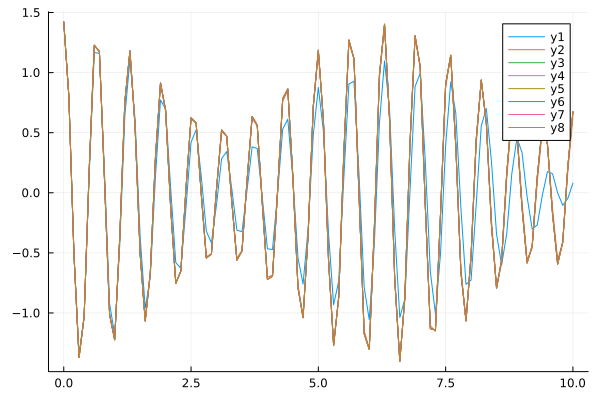

In [10]:
plot(sol0[1], sol0[2])
plot!(sol1[1], sol1[2])
plot!(sol2[1], sol2[2])
plot!(sol3[1], sol3[2])
plot!(sol4[1], sol4[2])
plot!(sol5[1], sol5[2])
plot!(sol6[1], sol6[2])
plot!(sol7[1], sol7[2])

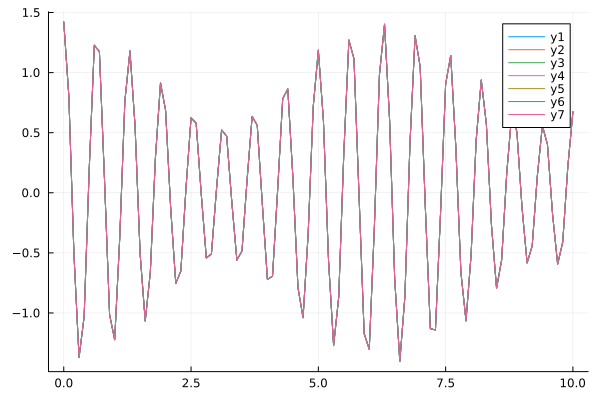

In [11]:
plot(sol4[1], sol4[2])
plot!(sol5[1], sol5[2])
plot!(sol6[1], sol6[2])
plot!(sol7[1], sol7[2])
plot!(sol8[1], sol8[2])
plot!(sol9[1], sol9[2])
plot!(sol10[1], sol10[2])

In [12]:
p = [1.0, 0.0]
fexact = similar(sol0[2])
fex2!(fexact, p, sol0[1])
ferr = Array{Array{Float64,1},1}(undef,10)
for i = 1:10
    ferr[i] = zeros(length(sol0[2]))
end
@. ferr[1] = fexact - sol1[2]
@. ferr[2] = fexact - sol2[2]
@. ferr[3] = fexact - sol3[2]
@. ferr[4] = fexact - sol4[2]
@. ferr[5] = fexact - sol5[2]
@. ferr[6] = fexact - sol6[2]
@. ferr[7] = fexact - sol7[2]
@. ferr[8] = fexact - sol8[2]
@. ferr[9] = fexact - sol9[2]
@. ferr[10] = fexact - sol10[2];

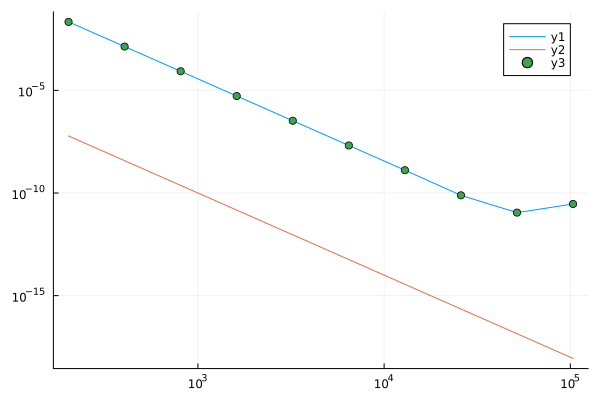

In [13]:
function l2norm(f)
    n = length(f)
    s = 0.0
    for i = 1:n
        s += f[i]*f[i]
    end
    return sqrt(s/(n-1))
end

fnrm = zeros(10)
for i = 1:10
    fnrm[i] = l2norm(ferr[i])
end

npts = zeros(10)
for i = 1:10
    npts[i] = length(sol0[1])*2^i
end

pline = similar(npts)
@. pline = 100.0/npts^4

plot(npts, fnrm, xaxis = :log10, yaxis=:log10)
plot!(npts, pline)
scatter!(npts, fnrm)